# How to make my own template for plots

Today we learn how to make my own template for plots.
I have to confess something. I have a problem with plots, graphics, visualizations. I have no problem with image or with decision what I have to create. I have a problem with realization.
In frankly speaking there are so many methods of creating plots in python, I can remember what to use it. Sure, if I could do some more exercises it would be easier for me. Never mind!
Fortunately somebody invented computer, who can remember this pretty mess. I decided to create special library of plots. This solution gave me independence.
I can make presentation faster because I don't have thought about colors or plot size. Every plot is the same, a have, prepared earlier my own style.
Are you convenience? Let's go to do template for plots !

Data preparation

At the first step we open data and needed libraries. 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## data source: https://s3.amazonaws.com/dq-blog-files/fortune500.csv
df = pd.read_csv('c:/1/Fortune500.txt')
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']
df.head(3)

,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4


We routinely check how formats have our columns. Turn out we have non numeric data in column: 'profit'. The reason of that may be any words or signs in place of numbers. We have to find out what kind of contamination are there.

In [7]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [11]:
df.profit.value_counts

<bound method IndexOpsMixin.value_counts of 0           806
1         584.8
2         195.4
3         212.6
4          19.1
5          18.5
6           1.6
7         182.8
8         183.8
9         344.4
10        132.8
11        117.2
12         84.6
13        226.1
14         55.8
15        121.1
16         37.4
17        211.9
18         48.1
19           37
20         91.6
21         36.3
22         40.5
23         89.8
24         40.5
25         36.2
26         52.3
27         52.9
28         43.7
29         76.2
          ...  
25470     306.4
25471     359.9
25472     235.8
25473    -118.5
25474     131.9
25475      14.9
25476     409.1
25477       257
25478     137.1
25479     -2165
25480     215.6
25481    -181.9
25482     192.4
25483     111.6
25484       524
25485      N.A.
25486       188
25487     331.2
25488      64.9
25489        49
25490      -458
25491       154
25492      71.8
25493       328
25494    -567.6
25495       493
25496     175.4
25497      57.8
25498      7

I detected contamination. So I wipe it out and exchange format from str in to float.

In [12]:
df.loc[df.profit=='N.A.']
df.profit.replace('N.A.',np.nan, inplace = True)
df = df.dropna(how='any')
df['profit'] = df['profit'].apply(pd.to_numeric)

Ok, we have data ready to next steps!
We do template for plots
I prepared template for linear plots. I use them most frequently because I am a financial analyst.
This ready for using template I put to my repository.
Now we need to have adequate prepared data to put into the template.

In [ ]:
def LinearPlot(x, y, ax, title, x_label, y_label):
    ax.set_title(title, color='darkred', alpha=1)
    ax.set_ylabel(y_label, color='grey', alpha=0.6)
    ax.set_xlabel(x_label, color='grey', alpha=0.6)
    ax.plot(x, y, color='black', alpha=0.6, linestyle='dashed')
    ax.grid(linewidth=0.85, alpha=0.2)
    ax.margins(x=0, y=0)

# Pivot table is the best

To have good linear plot we need three things: x arrow, y arrow and data.
Additionally, a title and descriptions of axes could be useful.
Now we create pivot table, next exchange it into dataframe.
Next easily query I separate x and y and data.

In [14]:
Ewa = df.pivot_table(index='year', values=['revenue', 'profit'], aggfunc='mean')
df2 = Ewa.reset_index()

x = df2.year
y = df2.profit
title = 'Profit fortune500'
y_label = 'Profit (millions)'
x_label = 'Years'

# Use template

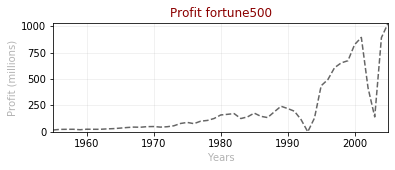

In [15]:
fig, ax = plt.subplots(figsize=(6, 2))
LinearPlot(x, y, ax, title, x_label, y_label)

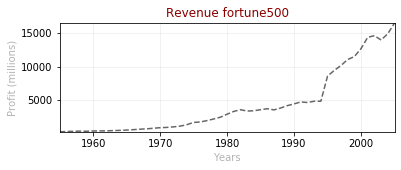

In [17]:
x = df2.year
y = df2.revenue
title = 'Revenue fortune500'
y_label = 'Profit (millions)'
x_label = 'Years'

fig, ax = plt.subplots(figsize=(6, 2))
LinearPlot(x, y, ax, title, x_label, y_label)

I hope this is good solution to do template for plots!